In [4]:
import tensorflow as tf
from utils.data import display_images, preprocess_image_input
from model.resnet50 import get_model
from utils.config import get_config

config = get_config('config.ini')

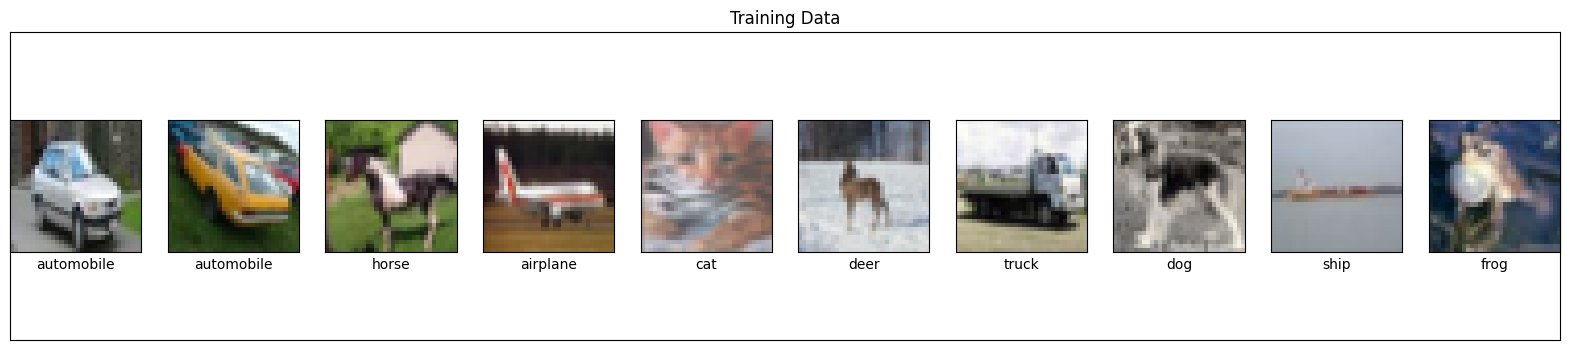

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(training_images, training_labels) , (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()
display_images(training_images, training_labels, "Training Data", classes)

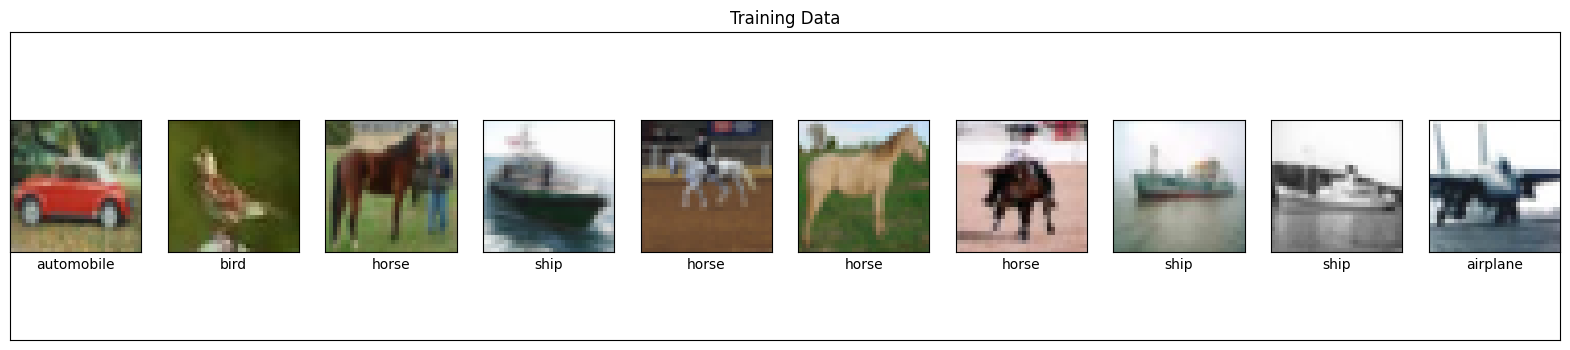

In [6]:
display_images(validation_images, validation_labels, "Training Data", classes)

In [7]:
model = get_model()
model.load_weights(config['DEFAULT']['ModelDir'] + config['DEFAULT']['ModelName'])

predictions = model.predict(preprocess_image_input(validation_images))
display_images(validation_images, predictions, "Predictions", classes)